<img src="ost_logo.png" width="240" height="240" align="right"/>
<div style="text-align: left"> <b> Machine Learning </b> <br> MSE FTP MachLe <br> 
<a href="mailto:christoph.wuersch@ost.ch"> Christoph Würsch </a> </div>

# ML08: A4 SVM with polynomial and linear kernel

MSE, FTP_MachLe, WÜRC


Whenever you have a model that is represented with inner products, you can plug in a kernel function. For instance, a linear kernel is the same as applying linear transformations to feature space. And, in this case, it’s the same as a support vector classifier, because the decision boundary is linear.
- With __polynomial kernels__, you’re projecting the original feature space into a polynomial feature space. So the decision boundary that separates the classes is defined with a higher order polynomial.

In [5]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def generate_random_dataset(size):
    """ Generate a random dataset and that follows a quadratic  distribution
    """
    x = []
    y = []
    target = []
    for i in range(size):
        # class zero
        x.append(np.round(random.uniform(0, 2.5), 1))
        y.append(np.round(random.uniform(0, 20), 1))
        target.append(0)
        # class one
        x.append(np.round(random.uniform(1, 5), 2))
        y.append(np.round(random.uniform(20, 25), 2))
        target.append(1)
        x.append(np.round(random.uniform(3, 5), 2))
        y.append(np.round(random.uniform(5, 25), 2))
        target.append(1)
    df_x = pd.DataFrame(data=x)
    df_y = pd.DataFrame(data=y)
    df_target = pd.DataFrame(data=target)
    data_frame = pd.concat([df_x, df_y], ignore_index=True, axis=1)
    data_frame = pd.concat([data_frame, df_target], ignore_index=True, axis=1)
    data_frame.columns = ['x', 'y', 'target']
    return data_frame



In [2]:
# Generate dataset
size = 100
dataset = generate_random_dataset(size)

X = dataset[['x', 'y']]
y = dataset['target']
dataset.to_csv('dataset.csv')


In [3]:
dataset.head()

,x,y,target
0,1.50,5.50,0
1,1.87,20.68,1
2,4.33,20.88,1
3,0.50,6.40,0
4,4.04,21.17,1


### (a) Split the data in 70% training  and 30% test data
 using `train_test_split` from `sklearn.model_selection`.

In [4]:
from sklearn.model_selection import train_test_split


### (b) Plot the training data as scatter plot using different colors for both classes.

In [1]:
# Plotting the training set


### (c) Fit an SVM with a second-degree polynomial kernel using $\gamma=0.1$ and $C=1$

There’s a little space between the two groups of data points. But closer to the center, it’s not clear which data point belongs to which class.
A quadratic curve might be a good candidate to separate these classes. 
__So let’s fit an SVM with a second-degree polynomial kernel.__

In [2]:
from sklearn import svm
model = svm.SVC(kernel='poly', degree=2,C=1,gamma=0.10)


### (d) Plot the margins and decision boundary of the classifier
- use the function `PlotDecisionBoundary(model,X,y)`
- The input arguments the instance of the trained model, the 2D array of the featues `X` and the 1D array of the target `y`.

In [7]:
# Plot the dataset
def PlotDecisionBoundary(model, X,y):

    #plot decision boundary for model in case of 2D feature space
    x1=X[:,0]
    x2=X[:,1]
    # Create grid to evaluate model
    xx = np.linspace(min(x1), max(x1), len(x1))
    yy = np.linspace(min(x1), max(x2), len(x2))
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    train_size = len(x1)

    # Assigning different colors to the classes
    colors = y
    colors = np.where(colors == 1, '#8C7298', '#4786D1')

    # Get the separating hyperplane
    Z = model.decision_function(xy).reshape(XX.shape)

    fig, ax = plt.subplots(figsize=(12, 7))
    ax.scatter(x1, x2, c=colors)

    # Draw the decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # Highlight support vectors with a circle around them
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.title('g=%f | C=%f' % (model.gamma,model.C))
    plt.show()

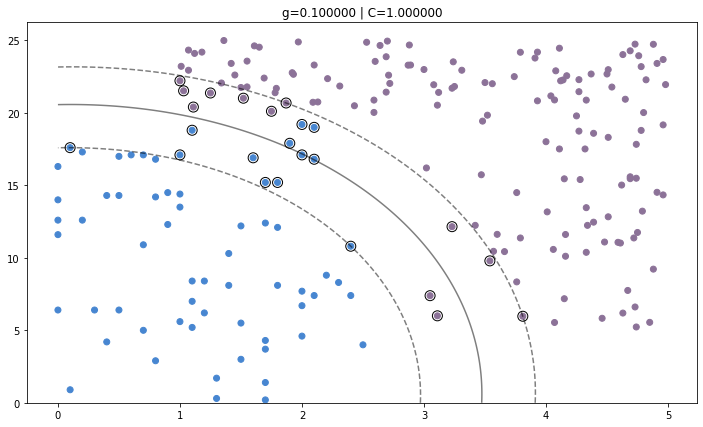

In [8]:
PlotDecisionBoundary(model, x_train.values,y_train)

### (e) Vary the hyperparameter $\gamma$ logarithmically in the range from $10^{-2}$ to $10^{+2}$ in 5 steps. 
 - set $C=1$ and plot for each value of the parameter $\gamma$ the decision boundary and the marigns.

In [6]:
gammaList=np.logspace(-2,2,5)

    

### (f) Vary the hyperparameter $C$ logarithmically in the range from $10^{0}$ to $10^{4}$ in 5 steps. 
 - set $\gamma=0.01$ and plot for each value of the parameter $C$ the decision boundary and the marigns.

In [7]:
gamma=0.001
CList=np.logspace(0,4,5)

